In [29]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from __future__ import division 
import seaborn as sns

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
p_k=pd.read_csv("police_killings.csv")

In [4]:
p_k.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954


This dataset contains information on the police killings in the U.S.  
We will explore it to answer the follwoing questions:  
1) Which age groups had high police killings  
2) Which 5 states has the highest/lowest  number of killings  
3) Explore the Racial distribution for the police killings  
4) Explore the gender wise distribution for the police killings  
5) What was the personal income in areas where shooting occured? Was it below the median income in the U.S?





In [21]:
p_k_2=p_k.copy()

In [57]:
age_lst=p_k["age"].tolist()


In [58]:
age_bins=[20,30,40,50,60,70,80,90]


In [60]:
age_cut=pd.cut(age_lst,age_bins)
age_cut

[NaN, (20, 30], (20, 30], (20, 30], (20, 30], ..., NaN, (20, 30], (50, 60], (30, 40], (40, 50]]
Length: 467
Categories (7, object): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]

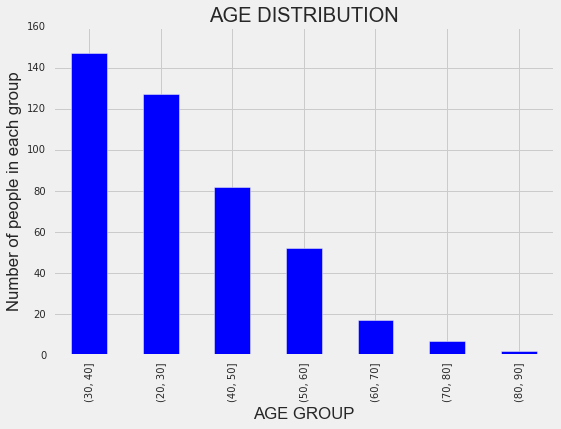

In [455]:
pd.value_counts(age_cut).plot(kind="bar")
plt.xlabel("AGE GROUP")
plt.ylabel("Number of people in each group")
plt.title("AGE DISTRIBUTION")

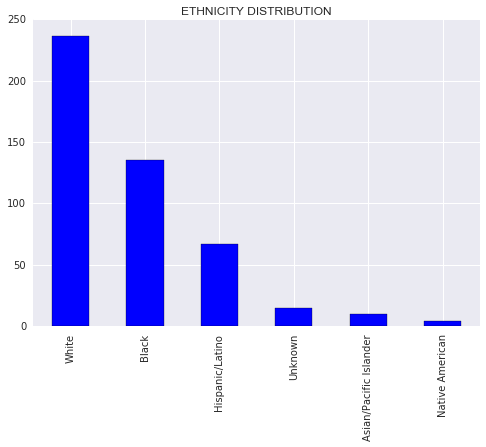

In [65]:
race_counts=p_k["raceethnicity"].value_counts()
race_counts.plot(kind="bar")
plt.title("ETHNICITY DISTRIBUTION")

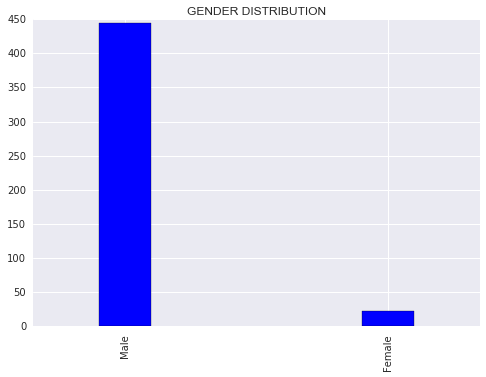

In [70]:
p_k["gender"].value_counts().plot(kind="bar",width=0.2)
plt.title("GENDER DISTRIBUTION")

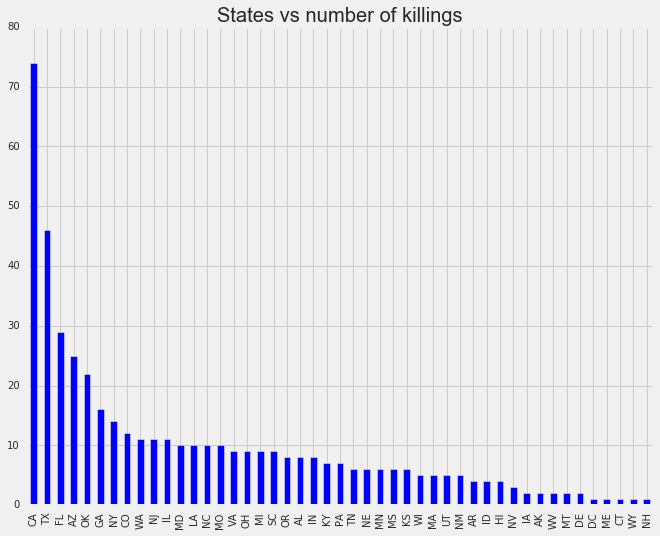

In [456]:
p_k["state"].value_counts().plot(kind="bar",figsize=(10,8))
plt.title("States vs number of killings")

From the graphs above we can deduce the following:  

1)Maximum killings were in age group 30-40  
2)More number of whites were killed than blacks.This comes as a surprise but is the population of whites greater than blacks to account for the same? will explore later.  
3)The top 5 states that accounted for max killings were CA,FL,AZ,ok,GA.But what we need to explore is that, was the population also higher in these states.?

 


In [78]:
p_k["p_income"].dtypes

dtype('O')

In [100]:
p_k=p_k[p_k["p_income"]!="-"]

In [105]:
p_k["p_income"]=p_k["p_income"].astype(float)

In [106]:
p_k["p_income"].dtypes

dtype('float64')

In [93]:
p_k_2.shape

(467, 34)

In [94]:
p_k.shape

(465, 34)

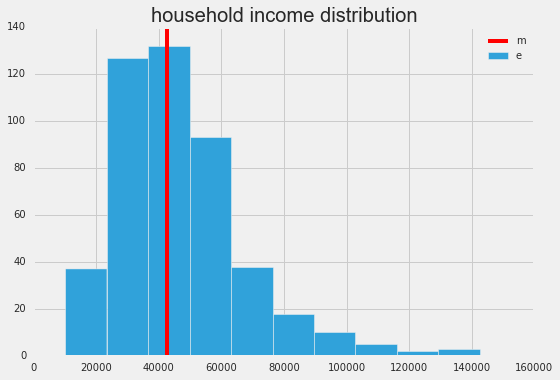

In [454]:
p_k["h_income"].hist()
plt.axvline(p_k["h_income"].median(),color="red")
plt.title("household income distribution")
plt.legend("median income")


The areas where police  killings happened had a median household income of 45,000 where as the  the median household income in the u.s is 50,000.



In [110]:
state_pop=pd.read_csv("state_pop.csv")

In [196]:
state_pop.rename(columns={"STATE":"state_fp"},inplace=True)

In [269]:

state_pop.head()

,state_fp,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
1,1,Alabama,4858979,3755483,77.3
2,2,Alaska,738432,552166,74.8
3,4,Arizona,6828065,5205215,76.2
4,5,Arkansas,2978204,2272904,76.3
5,6,California,39144818,30023902,76.7


In [284]:
killing=p_k["state_fp"].value_counts()
killing.values.shape

(47,)

In [282]:
kill_df=pd.DataFrame({"state_fp":killing.index,"number of shootings":killing.values})

In [285]:
kill_df.head()

,number of shootings,state_fp
0,74,6
1,47,48
2,29,12
3,25,4
4,22,40


In [288]:
state_pop=state_pop.merge(kill_df,on="state_fp")

In [293]:
state_pop.head()

,state_fp,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,number of shootings
0,1,Alabama,4858979,3755483,77.3,8
1,2,Alaska,738432,552166,74.8,2
2,4,Arizona,6828065,5205215,76.2,25
3,5,Arkansas,2978204,2272904,76.3,4
4,6,California,39144818,30023902,76.7,74


Lets calculate the adjusted killing rate for each state by dividing the number of shootings for that state by the millionth  population.
This will help us get the 10 states with highest/lowest shooting rate

In [302]:
state_pop["shooting/million of pop in state"]=state_pop["number of shootings"]/(state_pop['POPESTIMATE2015']/1000000)

In [309]:
state_pop.head()



,state_fp,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,number of shootings,shooting/million of pop in state
0,1,Alabama,4858979,3755483,77.3,8,1.646436
1,2,Alaska,738432,552166,74.8,2,2.708442
2,4,Arizona,6828065,5205215,76.2,25,3.661359
3,5,Arkansas,2978204,2272904,76.3,4,1.343091
4,6,California,39144818,30023902,76.7,74,1.890416


In [311]:
state_pop=state_pop.sort(['shooting/million of pop in state'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [315]:
state_pop.reset_index(inplace=True)

In [319]:
state_pop.drop(["index"],inplace=True,axis=1)

In [321]:
state_pop.reset_index(["state_fp"],inplace=True,drop=True)

In [324]:
state_pop.set_index(["state_fp"],inplace=True,drop=True)

In [325]:
state_pop.head()

,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,number of shootings,shooting/million of pop in state
state_fp,,,,,,
9,Connecticut,3590886,2826827,78.7,1,0.278483
42,Pennsylvania,12802503,10112229,79.0,7,0.546768
19,Iowa,3123899,2395103,76.7,2,0.640226
36,New York,19795791,15584974,78.7,13,0.656705
25,Massachusetts,6794422,5407335,79.6,5,0.735898


In [332]:
states_low=state_pop.iloc[0:10,:]

In [342]:
low_list=states_low.index.tolist()
low_list

[9, 42, 19, 36, 25, 33, 23, 39, 17, 55]

In [335]:
states_high=state_pop.tail(10)

In [344]:
high_list=states_high.index.tolist()
high_list

[10, 22, 8, 35, 16, 2, 15, 31, 4, 40]

In [337]:
states_high.head()

,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,number of shootings,shooting/million of pop in state
state_fp,,,,,,
10,Delaware,945934,741548,78.4,2,2.114312
22,Louisiana,4670724,3555911,76.1,10,2.140996
8,Colorado,5456574,4199509,77.0,12,2.199182
35,New Mexico,2085109,1588201,76.2,5,2.397956
16,Idaho,1654930,1222093,73.8,4,2.417021


In [369]:
p_k["share_white"]=p_k["share_white"].astype(float)
p_k["share_black"]=p_k["share_black"].astype(float)
p_k["share_hispanic"]=p_k['share_hispanic'].astype(float)

In [402]:
p_k_high=p_k[p_k["state_fp"].isin(high_list)]
p_k_highpiv=p_k_high.pivot_table(index="state",values=["share_white","share_black","share_hispanic"],aggfunc="sum")

p_k_highpiv.mean()


share_black       106.10
share_hispanic    190.38
share_white       512.00
dtype: float64

In [470]:
p_k_highpiv

,share_black,share_hispanic,share_white
state,,,
AK,22.8,23.8,75.9
AZ,91.3,861.1,1289.5
CO,100.0,370.6,679.5
DE,70.2,8.3,104.5
HI,21.9,20.2,135.2
ID,2.4,34.9,342.3
LA,497.1,78.6,385.9
NE,51.9,61.8,454.8
NM,4.9,195.1,278.3


In [420]:
shoot_counts=p_k_high["raceethnicity"].value_counts()
shoot_counts

White                     54
Black                     19
Hispanic/Latino           11
Native American            3
Asian/Pacific Islander     3
Unknown                    2
Name: raceethnicity, dtype: int64

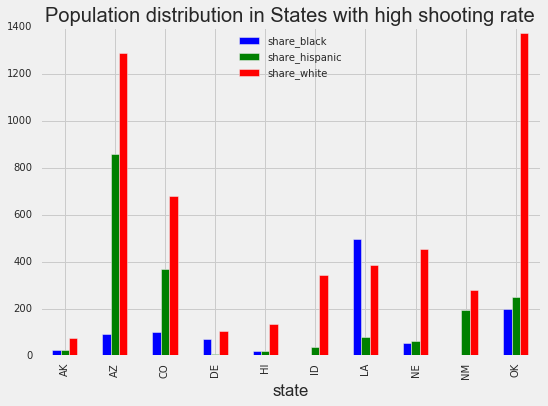

In [421]:
p_k_highpiv.plot(kind="bar")
plt.title("Population distribution in States with high shooting rate")

In our earlier graph the states with the highest number of killings were CA,FL,AZ,Ok,GA.
It is interesting to note that CA and Fl are not there now.This is because the total killing and population ratio in these states was way lower of population being higher.
In LA the share of black population is higher than whites.It would be interesting to find out if more blacks were killed than whites in LA.


In [476]:
p_k_high.columns

Index([u'name', u'age', u'gender', u'raceethnicity', u'month', u'day', u'year',
       u'streetaddress', u'city', u'state', u'latitude', u'longitude',
       u'state_fp', u'county_fp', u'tract_ce', u'geo_id', u'county_id',
       u'namelsad', u'lawenforcementagency', u'cause', u'armed', u'pop',
       u'share_white', u'share_black', u'share_hispanic', u'p_income',
       u'h_income', u'county_income', u'comp_income', u'county_bucket',
       u'nat_bucket', u'pov', u'urate', u'college', u'NAME_x',
       u'POPESTIMATE2015_x', u'NAME_y', u'POPESTIMATE2015_y', u'pop/ million'],
      dtype='object')

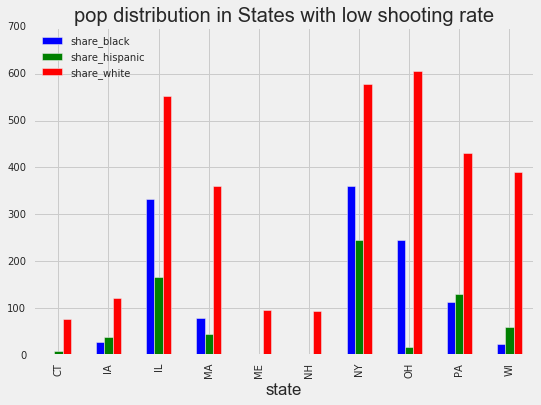

In [422]:
p_k_low=p_k[p_k["state_fp"].isin(low_list)]
p_k_lowpiv=p_k_low.pivot_table(index="state",values =["share_white","share_black","share_hispanic"],aggfunc="sum")

plt.style.use("fivethirtyeight")
p_k_lowpiv.plot(kind="bar")
plt.title("pop distribution in States with low shooting rate")


In [427]:
race_high=p_k_high["raceethnicity"].value_counts()[0:3]

In [438]:
race_high.values.sum()
high_percent=(race_high.values*100)/84


In [441]:
race_low=p_k_low["raceethnicity"].value_counts()
race_low.values.sum()
low_percent=(race_low.values*100)/55

In [445]:
new_df=pd.DataFrame({"ethnicity":race_high.index,"%killed_high":high_percent,"%killed_low":low_percent})

In [446]:
new_df.set_index(['ethnicity'],drop=True,inplace=True)

In [447]:
new_df

,%killed_high,%killed_low
ethnicity,,
White,64.285714,60.000000
Black,22.619048,36.363636
Hispanic/Latino,13.095238,3.636364


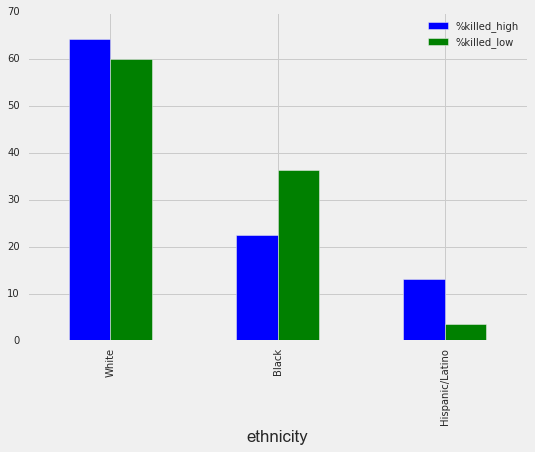

In [448]:
new_df.plot(kind="bar")

In states with low shooting rate,proportion of blacks killed was higher. The proportion of hispanics killed was higher in states with higher shooting rate.